## This notebook contains codes for my Coursera Capstone final project

In [2]:
import sys
sys.version

'3.6.10 | packaged by conda-forge | (default, Apr 24 2020, 16:44:11) \n[GCC 7.3.0]'

First we will start with comparison of the two cities using data parameters we have managed to obtain for our research


In [3]:
import numpy as np
import pandas as pd

In [4]:
#we will import CSV file containing annual average house price indices and use it as our first parameter

price=pd.read_csv('MSI CIJENE.csv', header=None)

#since the file is not too big, we will print out the whole csv
price

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.1.4.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PROSJEČNI GODIŠNJI INDEKSI CIJENA STAMBENIH OB...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANNUAL AVERAGE HOUSE PRICE INDICES1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Molimo korisnike da pri korištenju podataka na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Users are kindly requested to state the source.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Prosječni godišnji indeksi (Ø 2015. = 100)2),NaN,NaN,NaN,NaN,NaN,"Prosječne godišnje stope promjene, % (prethod...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Annual average indices (Ø 2015 = 100)2),NaN,NaN,NaN,NaN,NaN,"Annual average rates of change, % (previous ye...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Godina,ukupno,novi stambeni objekti,postojeći stambeni objekti,Grad Zagreb,Jadran,Ostalo,ukupno,novi stambeni objekti,postojeći stambeni objekti,...,Ostalo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Year,Total,New dwellings,Existing dwellings,City of Zagreb,Adriatic coast,Other,Total,New dwellings,Existing dwellings,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#there is a lot of uneccessary data in the table above so we will drop some values

price_cleaned=price.drop(price.index[range(0,9)]).drop(price.columns[range(6,22)], axis=1)
price_cleaned

,0,1,2,3,4,5
9,Year,Total,New dwellings,Existing dwellings,City of Zagreb,Adriatic coast
10,2002.,62.10,…,…,68.83,52.47
11,2003.,72.70,…,…,79.27,64.09
12,2004.,83.49,…,…,91.95,74.08
13,2005.,94.32,…,…,103.31,84.59
14,2006.,107.79,…,…,116.34,98.52
15,2007.,122.72,…,…,133.42,113.69
16,2008.,124.14,123.13,125.90,132.71,118.35
17,2009.,117.93,120.53,117.31,123.47,114.37
18,2010.,110.47,111.08,111.17,112.53,109.39


In [6]:
#we will drop some more values but before that we will rename the columns first
#since there are no explicit values for Split city, we will assign column 'Adriatic coast' to it

price_cleaned.rename(columns={0: 'year', 1: 'total', 2: 'X', 3: 'Y', 4: 'Zagreb', 5: 'Split'}, inplace=True)
price_cleaned

,year,total,X,Y,Zagreb,Split
9,Year,Total,New dwellings,Existing dwellings,City of Zagreb,Adriatic coast
10,2002.,62.10,…,…,68.83,52.47
11,2003.,72.70,…,…,79.27,64.09
12,2004.,83.49,…,…,91.95,74.08
13,2005.,94.32,…,…,103.31,84.59
14,2006.,107.79,…,…,116.34,98.52
15,2007.,122.72,…,…,133.42,113.69
16,2008.,124.14,123.13,125.90,132.71,118.35
17,2009.,117.93,120.53,117.31,123.47,114.37
18,2010.,110.47,111.08,111.17,112.53,109.39


In [7]:
df_price=price_cleaned.drop(price_cleaned.index[range(0,9)]).drop(price_cleaned.columns[range(1,4)], axis=1)
df_price

,year,Zagreb,Split
18,2010.,112.53,109.39
19,2011.,112.11,110.70
20,2012.,109.92,108.74
21,2013.,103.51,105.52
22,2014.,102.18,103.37
23,2015.,100.00,100.00
24,2016.,100.72,101.32
25,2017.,105.08,105.74
26,2018.,116.37,111.39
27,2019.,131.75,119.08


In [8]:
#we will get rid of the rows below year 2019

price_final=df_price.drop(df_price.index[range(10,19)])
price_final

,year,Zagreb,Split
18,2010.,112.53,109.39
19,2011.,112.11,110.70
20,2012.,109.92,108.74
21,2013.,103.51,105.52
22,2014.,102.18,103.37
23,2015.,100.00,100.00
24,2016.,100.72,101.32
25,2017.,105.08,105.74
26,2018.,116.37,111.39
27,2019.,131.75,119.08


In [9]:
#checking for the data types
price_final.dtypes

year      object
Zagreb    object
Split     object
dtype: object

In [10]:
#converting object types into float so we can plot the data
price_final=price_final.astype(float)
price_final.dtypes

year      float64
Zagreb    float64
Split     float64
dtype: object

In [11]:
#converting values in column 'year' to int so we can set it up as an index
price_final['year']=price_final.year.astype(int)
price_final.dtypes

year        int64
Zagreb    float64
Split     float64
dtype: object

In [12]:
#we will set column 'year' as our index
price_final.set_index('year', inplace=True)
price_final

,Zagreb,Split
year,,
2010,112.53,109.39
2011,112.11,110.70
2012,109.92,108.74
2013,103.51,105.52
2014,102.18,103.37
2015,100.00,100.00
2016,100.72,101.32
2017,105.08,105.74
2018,116.37,111.39


In [13]:
#now we can visualize the dataframe
#first we will import plotting library and check it's latest version

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

print('matplotlib version: ', mpl.__version__)

matplotlib version:  3.1.1


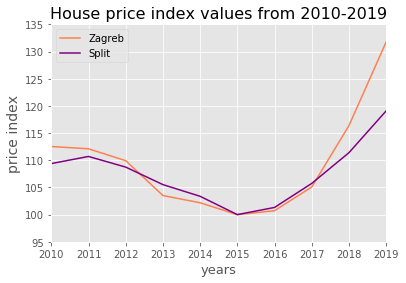

In [14]:
plt.style.use('ggplot')
price_final.plot(kind='line', color=['coral', 'purple'])


plt.xlabel('years', fontsize=13)
plt.ylabel('price index', fontsize=14)
plt.title('House price index values from 2010-2019', fontsize=16)
plt.axis([2010, 2019, 95, 135])
plt.show()

In [15]:
#from the table above we can see house price index is higher in Zagreb
#let's input more data

visitors=pd.read_csv('visitors.csv')
visitors.head(3)

,DOLASCI PRIJAVLJENIH TURISTA ZA RAZDOBLJE SIJEČANJ - STUDENI 2019./2018. PO ŽUPANIJAMA (SVI KAPACITETI),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,I-XI 2019.,NaN,NaN,NaN,I-XI 2018.,NaN,NaN,NaN,indeks 2019./2018.,NaN,NaN
2,R.B.,Županija,Domaći,Strani,Ukupno,% Dolasci,Domaći,Strani,Ukupno,% Dolasci,Domaći,Strani,Ukupno


In [16]:
df_visitors=visitors.drop(visitors.index[range(0,10)]).drop(visitors.columns[range(5,13)], axis=1)
df_visitors

,DOLASCI PRIJAVLJENIH TURISTA ZA RAZDOBLJE SIJEČANJ - STUDENI 2019./2018. PO ŽUPANIJAMA (SVI KAPACITETI),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
10,6,Splitsko-dalmatinska,"311,153","3,612,175","3,923,328"
11,7,Dubrovačko-neretvanska,"126,986","2,172,867","2,299,853"
12,NaN,NaN,NaN,NaN,NaN
13,NaN,UKUPNO Dalmacija,"923,940","8,441,374","9,365,314"
14,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
152,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN


In [17]:
df2_visitors=df_visitors.drop(df_visitors.index[range(8,147)]).drop(df_visitors.columns[0], axis=1)
df2_visitors

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
10,Splitsko-dalmatinska,"311,153","3,612,175","3,923,328"
11,Dubrovačko-neretvanska,"126,986","2,172,867","2,299,853"
12,NaN,NaN,NaN,NaN
13,UKUPNO Dalmacija,"923,940","8,441,374","9,365,314"
14,NaN,NaN,NaN,NaN
15,UKUPNO Jadran,"1,667,371","16,181,753","17,849,124"
16,NaN,NaN,NaN,NaN
17,Grad Zagreb,"198,940","1,124,365","1,323,305"


In [18]:
df3_visitors=df2_visitors.drop(df2_visitors.index[range(1,7)]).drop(df2_visitors.columns[range(1,3)], axis=1)
df3_visitors

,Unnamed: 1,Unnamed: 4
10,Splitsko-dalmatinska,"3,923,328"
17,Grad Zagreb,"1,323,305"


In [19]:
#rename columns

df3_visitors.rename(columns={'Unnamed: 1': 'city', 'Unnamed: 4': 'total visitors'}, inplace=True)
df3_visitors

,city,total visitors
10,Splitsko-dalmatinska,"3,923,328"
17,Grad Zagreb,"1,323,305"


In [20]:
df3_visitors['city']=df3_visitors['city'].replace('Splitsko-dalmatinska','Split', regex=True)
df3_visitors

,city,total visitors
10,Split,"3,923,328"
17,Grad Zagreb,"1,323,305"


In [21]:
df3_visitors['city']=df3_visitors['city'].replace('Grad Zagreb','Zagreb', regex=True)
df3_visitors

,city,total visitors
10,Split,"3,923,328"
17,Zagreb,"1,323,305"


In [22]:
df3_visitors.dtypes

city              object
total visitors    object
dtype: object

In [23]:
df3_visitors.set_index('city', inplace=True)
df3_visitors

,total visitors
city,
Split,"3,923,328"
Zagreb,"1,323,305"


In [24]:
df_shore=pd.read_csv('shore distance.csv')
df_shore

,City,distance from seashore
0,Zagreb,160km
1,Split,1.4km
2,Pula,2.6km
3,Rijeka,16km
4,Dubrovnik,5.3km
5,Osijek,440km
6,Slavonski Brod,340km


In [25]:
visitors = ['1 323 305', '3 923 328', '4 561 303', '3 087 281', '2 299 853', '104 159', '35 386']
df_shore['Visitors']=visitors
df_shore

,City,distance from seashore,Visitors
0,Zagreb,160km,1 323 305
1,Split,1.4km,3 923 328
2,Pula,2.6km,4 561 303
3,Rijeka,16km,3 087 281
4,Dubrovnik,5.3km,2 299 853
5,Osijek,440km,104 159
6,Slavonski Brod,340km,35 386


In [26]:
df_shore.set_index('City', inplace=True)
df_shore

,distance from seashore,Visitors
City,,
Zagreb,160km,1 323 305
Split,1.4km,3 923 328
Pula,2.6km,4 561 303
Rijeka,16km,3 087 281
Dubrovnik,5.3km,2 299 853
Osijek,440km,104 159
Slavonski Brod,340km,35 386


In [27]:
df_shore.rename(columns={'distance from seashore':'Distance'}, inplace=True)
df_shore

,Distance,Visitors
City,,
Zagreb,160km,1 323 305
Split,1.4km,3 923 328
Pula,2.6km,4 561 303
Rijeka,16km,3 087 281
Dubrovnik,5.3km,2 299 853
Osijek,440km,104 159
Slavonski Brod,340km,35 386


In [28]:
df_shore['Distance']=df_shore['Distance'].replace('km','',regex=True)
df_shore

,Distance,Visitors
City,,
Zagreb,160,1 323 305
Split,1.4,3 923 328
Pula,2.6,4 561 303
Rijeka,16,3 087 281
Dubrovnik,5.3,2 299 853
Osijek,440,104 159
Slavonski Brod,340,35 386


In [29]:
df_shore['Visitors']=df_shore['Visitors'].replace(' ','',regex=True)
df_shore

,Distance,Visitors
City,,
Zagreb,160,1323305
Split,1.4,3923328
Pula,2.6,4561303
Rijeka,16,3087281
Dubrovnik,5.3,2299853
Osijek,440,104159
Slavonski Brod,340,35386


In [30]:
df_shore.dtypes

Distance    object
Visitors    object
dtype: object

In [31]:
df_shore=df_shore.astype(float)

In [32]:
df_shore['Visitors']=df_shore['Visitors'].astype(int)
df_shore.dtypes

Distance    float64
Visitors      int64
dtype: object

In [33]:
df_shore

,Distance,Visitors
City,,
Zagreb,160.0,1323305
Split,1.4,3923328
Pula,2.6,4561303
Rijeka,16.0,3087281
Dubrovnik,5.3,2299853
Osijek,440.0,104159
Slavonski Brod,340.0,35386


<function matplotlib.pyplot.show(*args, **kw)>

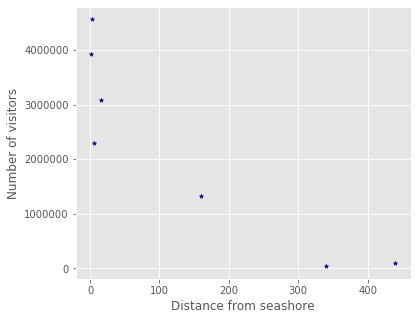

In [34]:
df_shore.plot(kind='scatter', x='Distance', y='Visitors', color= 'darkblue', marker='*', figsize=(6,5))

plt.xlabel('Distance from seashore')
plt.ylabel('Number of visitors')

plt.show

At this point we have disregarded Zagreb as our location choice. Now we will use Foursquare to collect more data on Split venues and their locations

We will import the necessary libraries first

In [35]:
import requests # library to handle requests
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         393 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

In [36]:
CLIENT_ID = 'XXX' # my Foursquare ID
CLIENT_SECRET = 'YYY' # my Foursquare Secret
VERSION = '20200623'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXX
CLIENT_SECRET:YYY


In [37]:
address = 'Split, Croatia'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.5116383 16.4399659


Let's visualize the coordinates and put a marker on the map for the ones specified

In [76]:
split_map=folium.Map(location=[latitude, longitude], zoom_start=13)
folium.Marker([latitude, longitude]).add_to(split_map)
split_map

In [60]:
radius=5000

In [71]:
LIMIT=100

In [72]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=GITKTVCSY1TDDSPI0Y41AKJ20PLUFNMHQT0EWV211GGX31SW&client_secret=UDJYMXNRPFW0EBG5XJDLK0JUSSGHPFB5Y4QLDEG4PYBOWVQR&ll=43.5116383,16.4399659&v=20200623&radius=5000&limit=100'

In [73]:
results = requests.get(url).json()
'There are {} popular spots around Split city center.'.format(len(results['response']['groups'][0]['items']))

'There are 100 popular spots around Split city center.'

In [74]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '501d6c9ae4b0b1c509df25a1',
  'name': 'Split Old Town',
  'location': {'lat': 43.50871663159877,
   'lng': 16.43877264115769,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.50871663159877,
     'lng': 16.43877264115769}],
   'distance': 339,
   'postalCode': '21000',
   'cc': 'HR',
   'city': 'Split',
   'state': 'Splitsko-Dalmatinska Županija',
   'country': 'Hrvatska',
   'formattedAddress': ['21000 Split', 'Hrvatska']},
  'categories': [{'id': '4f2a25ac4b909258e854f55f',
    'name': 'Neighborhood',
    'pluralName': 'Neighborhoods',
    'shortName': 'Neighborhood',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-501d6c9ae4b0b1c509df25a1-0'}

In [75]:
dataframe = pd.json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,neighborhood,id
0,Split Old Town,Neighborhood,43.508717,16.438773,"[{'label': 'display', 'lat': 43.50871663159877...",339,21000,HR,Split,Splitsko-Dalmatinska Županija,Hrvatska,"[21000 Split, Hrvatska]",NaN,NaN,NaN,501d6c9ae4b0b1c509df25a1
1,Bokeria,Wine Bar,43.509563,16.438290,"[{'label': 'display', 'lat': 43.50956291538956...",267,21000,HR,Split,Splitsko-Dalmatinska Županija,Hrvatska,"[2 Cosmijeva Ulica, 21000 Split, Hrvatska]",2 Cosmijeva Ulica,NaN,NaN,53ca7715498ec00d435b7fe1
2,4coffee Soul Food,Coffee Shop,43.508799,16.441683,"[{'label': 'display', 'lat': 43.50879936177184...",345,21000,HR,Split,Splitsko-Dalmatinska Županija,Hrvatska,"[Hrvoja Vukčevića Hrvatinića 9, 21000 Split, H...",Hrvoja Vukčevića Hrvatinića 9,NaN,NaN,55faa6f6498e7eb8bea9bc58
3,Luka Ice Cream & Cakes,Ice Cream Shop,43.511367,16.436745,"[{'label': 'display', 'lat': 43.51136687997295...",261,21000,HR,Split,Splitsko-Dalmatinska Županija,Hrvatska,"[Svačićeva 2, 21000 Split, Hrvatska]",Svačićeva 2,NaN,NaN,53a312a4498e330425b73d74
4,Dioklecijanova palača | Diocletian's Palace (D...,Historic Site,43.508243,16.440266,"[{'label': 'display', 'lat': 43.50824280079828...",378,21000,HR,Split,Splitsko-Dalmatinska Županija,Hrvatska,"[Obala Hrvatskoga narodnoga preporoda 8, 21000...",Obala Hrvatskoga narodnoga preporoda 8,NaN,NaN,4c507abe0ef3a59393a1727a
5,Marvlvs Library Jazz Bar,Jazz Club,43.508530,16.440938,"[{'label': 'display', 'lat': 43.50852973868132...",354,21000,HR,Split,Splitsko-Dalmatinska Županija,Hrvatska,"[Papalićeva 4 (City Museum), 21000 Split, Hrva...",Papalićeva 4,City Museum,Old Town,52961aec498e059d2d25e220
6,Corto Maltese,Restaurant,43.509340,16.437563,"[{'label': 'display', 'lat': 43.50934038204824...",321,21000,HR,Split,Splitsko-Dalmatinska Županija,Hrvatska,"[Kovačića 6, 21000 Split, Hrvatska]",Kovačića 6,NaN,NaN,5545caeb498ecd2c30b44633
7,Zinfandel,Mediterranean Restaurant,43.508342,16.439002,"[{'label': 'display', 'lat': 43.5083416843853,...",375,21000,HR,Split,Splitsko-Dalmatinska Županija,Hrvatska,"[Marka Marulića 2 (Jupiter Temple), 21000 Spli...",Marka Marulića 2,Jupiter Temple,NaN,5191323e498e4fab62df4728
8,Splitska riva,Pedestrian Plaza,43.507931,16.438548,"[{'label': 'display', 'lat': 43.5079309426656,...",428,21000,HR,Split,Splitsko-Dalmatinska Županija,Hrvatska,"[Obala Hrvatskog narodnog preporoda, 21000 Spl...",Obala Hrvatskog narodnog preporoda,NaN,NaN,4bb8c6853db7b7137697219a
9,Villa Spiza,Mediterranean Restaurant,43.509544,16.439354,"[{'label': 'display', 'lat': 43.50954374416179...",238,21000,HR,Split,Dalmacia,Hrvatska,"[Kruziceva 3, 21000 Split, Hrvatska]",Kruziceva 3,NaN,NaN,515c3e95e4b00578e8a8a7c7


In [86]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Split City Center


# add Split City Center as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Split City Center',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

In [89]:
from folium import plugins

# let's start again with a clean copy of the map of Split
split_map = folium.Map(location = [latitude, longitude], zoom_start = 15)

# instantiate a mark cluster object for the venuess in the dataframe
venues = plugins.MarkerCluster().add_to(split_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(venues)

# display map
split_map

In [90]:
print(dataframe_filtered.shape)

(100, 16)
